In [1]:
import json
import pandas as pd

In [2]:


# Load JSON data
with open("heyohriver.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Inspect the type of data
print(type(data))

# If it's a list, print the first few items
if isinstance(data, list):
    print(data[:5])  # Preview first few elements
elif isinstance(data, dict):
    print(json.dumps(data, indent=4))  # Pretty-print if it's a dictionary


<class 'dict'>
{
    "collaborative": false,
    "description": "",
    "external_urls": {
        "spotify": "https://open.spotify.com/playlist/1zkcrdojxO7N3QiDaG28wJ"
    },
    "followers": {
        "href": null,
        "total": 1
    },
    "href": "https://api.spotify.com/v1/playlists/1zkcrdojxO7N3QiDaG28wJ?additional_types=track",
    "id": "1zkcrdojxO7N3QiDaG28wJ",
    "images": [
        {
            "height": 640,
            "url": "https://mosaic.scdn.co/640/ab67616d00001e02076eb1d3413622e2de8b757bab67616d00001e0241b08b8d9f21f856ede9bbc2ab67616d00001e02df53bbc68be612f70b5ef004ab67616d00001e02f18ce5dc5f6b0843d3acb3a1",
            "width": 640
        },
        {
            "height": 300,
            "url": "https://mosaic.scdn.co/300/ab67616d00001e02076eb1d3413622e2de8b757bab67616d00001e0241b08b8d9f21f856ede9bbc2ab67616d00001e02df53bbc68be612f70b5ef004ab67616d00001e02f18ce5dc5f6b0843d3acb3a1",
            "width": 300
        },
        {
            "height": 60,
     

In [3]:
df = pd.json_normalize(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   collaborative                1 non-null      bool  
 1   description                  1 non-null      object
 2   href                         1 non-null      object
 3   id                           1 non-null      object
 4   images                       1 non-null      object
 5   name                         1 non-null      object
 6   primary_color                0 non-null      object
 7   public                       1 non-null      bool  
 8   snapshot_id                  1 non-null      object
 9   type                         1 non-null      object
 10  uri                          1 non-null      object
 11  external_urls.spotify        1 non-null      object
 12  followers.href               0 non-null      object
 13  followers.total              1 non-null

In [5]:
df.head()

,collaborative,description,href,id,images,name,primary_color,public,snapshot_id,type,...,owner.id,owner.type,owner.uri,tracks.href,tracks.items,tracks.limit,tracks.next,tracks.offset,tracks.previous,tracks.total
0,False,,https://api.spotify.com/v1/playlists/1zkcrdojx...,1zkcrdojxO7N3QiDaG28wJ,"[{'height': 640, 'url': 'https://mosaic.scdn.c...",Hey Oh River,None,True,AAAAFWGY6ZgCHPZYf2o/qam2gK7EPA3R,playlist,...,1225630715,user,spotify:user:1225630715,https://api.spotify.com/v1/playlists/1zkcrdojx...,"[{'added_at': '2024-04-20T02:58:19Z', 'added_b...",100,None,0,None,16


In [6]:
df= df['tracks.items'].apply(pd.Series)


In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,"{'added_at': '2024-04-20T02:58:19Z', 'added_by...","{'added_at': '2024-04-20T02:58:27Z', 'added_by...","{'added_at': '2024-04-20T02:59:37Z', 'added_by...","{'added_at': '2024-04-20T02:59:48Z', 'added_by...","{'added_at': '2024-04-20T03:00:28Z', 'added_by...","{'added_at': '2024-04-20T03:54:43Z', 'added_by...","{'added_at': '2024-04-20T04:01:19Z', 'added_by...","{'added_at': '2024-04-20T04:06:40Z', 'added_by...","{'added_at': '2024-04-26T21:56:07Z', 'added_by...","{'added_at': '2024-07-02T04:53:52Z', 'added_by...","{'added_at': '2024-07-02T04:55:34Z', 'added_by...","{'added_at': '2024-08-30T20:48:54Z', 'added_by...","{'added_at': '2024-09-14T03:50:56Z', 'added_by...","{'added_at': '2024-09-28T19:27:39Z', 'added_by...","{'added_at': '2024-10-12T23:34:04Z', 'added_by...","{'added_at': '2024-11-05T17:55:58Z', 'added_by..."


In [8]:
df.T

,0
0,"{'added_at': '2024-04-20T02:58:19Z', 'added_by..."
1,"{'added_at': '2024-04-20T02:58:27Z', 'added_by..."
2,"{'added_at': '2024-04-20T02:59:37Z', 'added_by..."
3,"{'added_at': '2024-04-20T02:59:48Z', 'added_by..."
4,"{'added_at': '2024-04-20T03:00:28Z', 'added_by..."
5,"{'added_at': '2024-04-20T03:54:43Z', 'added_by..."
6,"{'added_at': '2024-04-20T04:01:19Z', 'added_by..."
7,"{'added_at': '2024-04-20T04:06:40Z', 'added_by..."
8,"{'added_at': '2024-04-26T21:56:07Z', 'added_by..."
9,"{'added_at': '2024-07-02T04:53:52Z', 'added_by..."


In [9]:
tdf=[]
df = df[0].apply(pd.Series)


In [10]:
df.head()

,added_at,added_by,is_local,primary_color,track,video_thumbnail
0,2024-04-20T02:58:19Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'preview_url': None, 'available_markets': ['A...",{'url': None}


In [11]:
df = df['track'].apply(pd.Series)


In [12]:
df.head()

,preview_url,available_markets,explicit,type,episode,track,album,artists,disc_number,track_number,duration_ms,external_ids,external_urls,href,id,name,popularity,uri,is_local
0,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,179526,{'isrc': 'AUBEC1712176'},{'spotify': 'https://open.spotify.com/track/5n...,https://api.spotify.com/v1/tracks/5nw2rQXAjfpZ...,5nw2rQXAjfpZNaMzAJ8qTX,Smoko,53,spotify:track:5nw2rQXAjfpZNaMzAJ8qTX,False


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np



In [14]:
data = pd.read_csv('playlist_exit_ticket.csv')
features = ['average_track_popularity', 'average_artist_popularity', 'average_danceability']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
best_silhouette_score = -1
best_eps = 0
best_min_samples = 0
best_dbscan_model = None
for eps in np.arange(0.1, 1.2, 0.1):  
    for min_samples in range(2, 6):  
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)

        print(f"Checking eps={eps}, min_samples={min_samples}")  # Debugging statement

        if len(set(clusters)) > 1 and len(set(clusters)) < len(X):
            score = silhouette_score(X_scaled, clusters)
            print(f"eps: {eps}, min_samples: {min_samples}, Silhouette Score: {score}")
            
            if score > best_silhouette_score:
                best_silhouette_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_dbscan_model = dbscan

# Print the optimal values and silhouette score
print("\nOptimal DBSCAN Model:")
print(f"eps: {best_eps}")
print(f"min_samples: {best_min_samples}")
print(f"Best Silhouette Score: {best_silhouette_score}")

# Train the optimal DBSCAN model on the data
optimal_dbscan = best_dbscan_model.fit(X_scaled)

# Optionally, you can check the number of clusters
print("\nNumber of clusters found by the optimal model:", len(set(optimal_dbscan.labels_)) - (1 if -1 in optimal_dbscan.labels_ else 0))



Checking eps=0.1, min_samples=2
Checking eps=0.1, min_samples=3
Checking eps=0.1, min_samples=4
Checking eps=0.1, min_samples=5
Checking eps=0.2, min_samples=2
eps: 0.2, min_samples: 2, Silhouette Score: -0.0490229614953406
Checking eps=0.2, min_samples=3
Checking eps=0.2, min_samples=4
Checking eps=0.2, min_samples=5
Checking eps=0.30000000000000004, min_samples=2
eps: 0.30000000000000004, min_samples: 2, Silhouette Score: 0.06910492864086303
Checking eps=0.30000000000000004, min_samples=3
Checking eps=0.30000000000000004, min_samples=4
Checking eps=0.30000000000000004, min_samples=5
Checking eps=0.4, min_samples=2
eps: 0.4, min_samples: 2, Silhouette Score: 0.06910492864086303
Checking eps=0.4, min_samples=3
Checking eps=0.4, min_samples=4
Checking eps=0.4, min_samples=5
Checking eps=0.5, min_samples=2
eps: 0.5, min_samples: 2, Silhouette Score: -0.03233379822108207
Checking eps=0.5, min_samples=3
Checking eps=0.5, min_samples=4
Checking eps=0.5, min_samples=5
Checking eps=0.6, min_s

In [15]:
playlist_3_cluster = best_dbscan_model.labels_[data.index[data['playlist'] == 'Playlist 3'][0]]
print(f"Playlist 3 is in Cluster {playlist_3_cluster}")


Playlist 3 is in Cluster 0


In [16]:
cluster_data = data[best_dbscan_model.labels_ == playlist_3_cluster]

In [17]:
cluster_averages = cluster_data[["average_track_popularity", "average_artist_popularity", "average_danceability"]].mean()
print(cluster_averages)

average_track_popularity     69.820000
average_artist_popularity    73.247059
average_danceability          0.649764
dtype: float64


C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

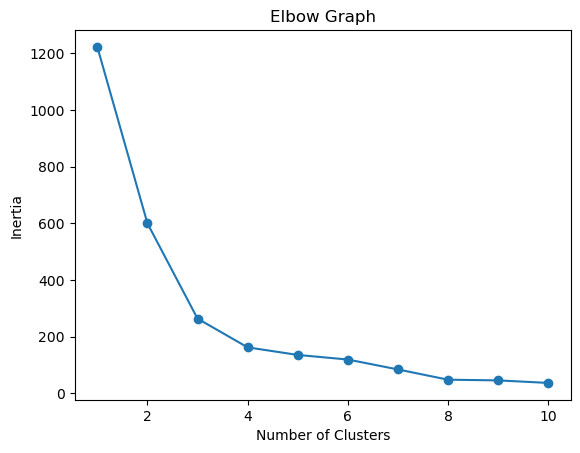

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
tests=[]

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    tests.append(kmeans.inertia_)
plt.plot(range(1, 11), tests, marker='o')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

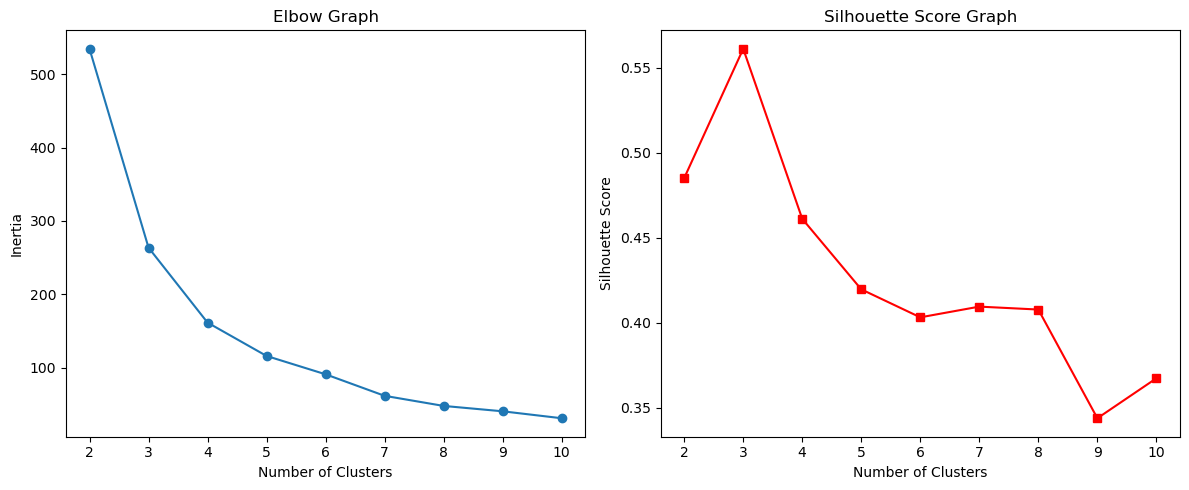

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia_scores = []
silhouette_scores = []

for k in range(2, 11):  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_scores, marker='o', linestyle='-')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='s', linestyle='-', color='red')
plt.title('Silhouette Score Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Optimal Number of Clusters: 3
Highest Silhouette Score: 0.5612


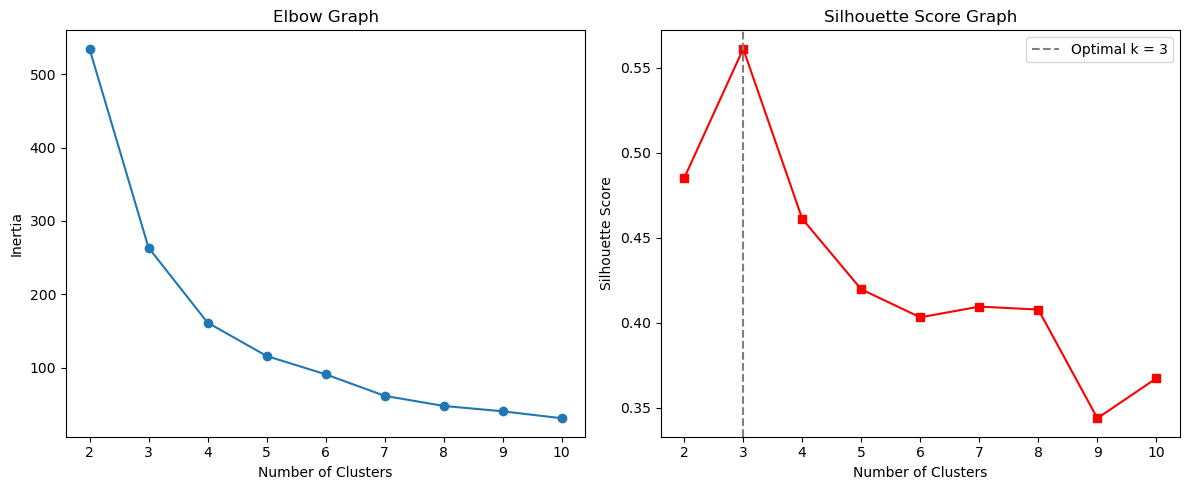

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia_scores = []
silhouette_scores = []
k_values = range(2, 11)  # k starts from 2 because silhouette score is undefined for k=1

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

# Identify the optimal k based on the highest silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_silhouette = max(silhouette_scores)

# Print optimal cluster information
print(f"Optimal Number of Clusters: {optimal_k}")
print(f"Highest Silhouette Score: {optimal_silhouette:.4f}")

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_scores, marker='o', linestyle='-')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='s', linestyle='-', color='red')
plt.axvline(optimal_k, color='gray', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Silhouette Score Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters: 2, Silhouette Score: 0.4851
Clusters: 3, Silhouette Score: 0.5612


C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters: 4, Silhouette Score: 0.4611
Clusters: 5, Silhouette Score: 0.4196


C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters: 6, Silhouette Score: 0.4031
Clusters: 7, Silhouette Score: 0.4094


C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters: 8, Silhouette Score: 0.4077
Clusters: 9, Silhouette Score: 0.3437


C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters: 10, Silhouette Score: 0.3672

Optimal Number of Clusters: 3
Highest Silhouette Score: 0.5612 (Best Model)


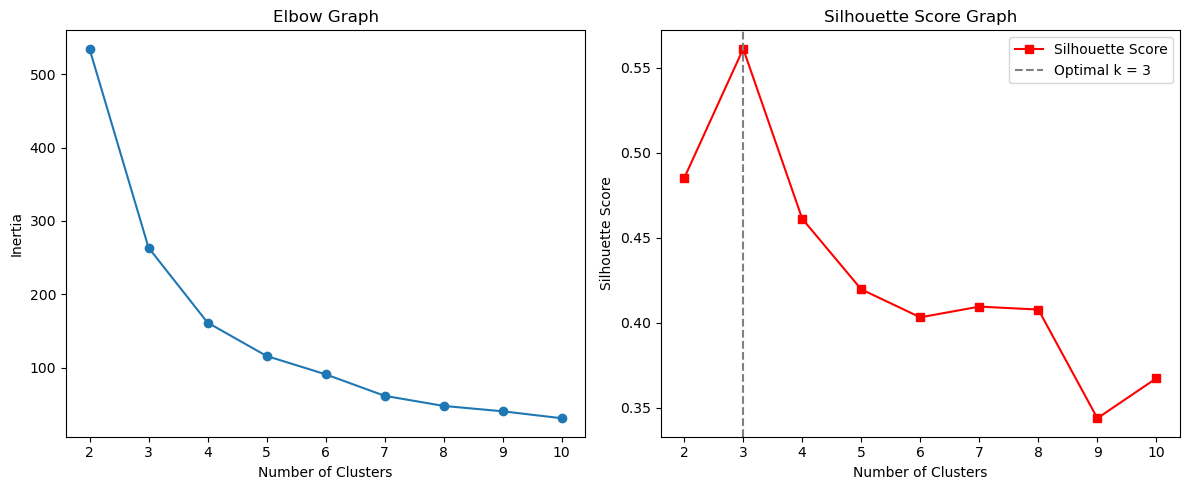

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia_scores = []
silhouette_scores = []
k_values = range(2, 11)  # k starts from 2 because silhouette score is undefined for k=1

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    inertia_scores.append(kmeans.inertia_)
    silhouette = silhouette_score(X, labels)
    silhouette_scores.append(silhouette)

    # Print silhouette score for each k
    print(f"Clusters: {k}, Silhouette Score: {silhouette:.4f}")

# Identify the optimal k based on the highest silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_silhouette = max(silhouette_scores)

# Highlight the best silhouette score
print(f"\nOptimal Number of Clusters: {optimal_k}")
print(f"Highest Silhouette Score: {optimal_silhouette:.4f} (Best Model)")

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_scores, marker='o', linestyle='-')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='s', linestyle='-', color='red', label="Silhouette Score")
plt.axvline(optimal_k, color='gray', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Silhouette Score Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()

plt.tight_layout()
plt.show()
